## Statistical Thinking for Data Science Assignment 3
## Data Science Models for Telecommunication Marketing Campaigns
##### Juan Diego Balsero Leon
##### Student ID: 24896577

### Initial Setup

In [63]:
#Importing the python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing statsmodels api
import statsmodels.api as sm
from scipy import stats

#Importing sklearn libraries
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, confusion_matrix, roc_auc_score, accuracy_score, recall_score, f1_score, ConfusionMatrixDisplay


#Importing 'warnings' to ignore future warnings and Data conversion warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)

#Displaying all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [64]:
data = pd.read_csv('TeleCom_Data_2.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [65]:
data.shape

(41180, 21)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [67]:
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41180.000000,41180,41180,41180,41180,41180,41180,41180,41180,41180,41180.000000,41180.000000,41180.000000,41180.000000,41180,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24921,12166,32581,21571,33943,26140,13765,8622,NaN,NaN,NaN,NaN,35559,NaN,NaN,NaN,NaN,NaN,36542
mean,40.021710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.280427,2.567800,962.516707,0.172705,NaN,0.081901,93.575508,-40.501999,3.621422,5167.053344,NaN
std,10.419593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.299856,2.770225,186.809028,0.493719,NaN,1.571037,0.578762,4.627358,1.734385,72.230334,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Feature Selection

The target variable will be subject of encoding to facilitate the process of analysing correlations and model convergence.

In [68]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})
data['y'] = data['y'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41180 non-null  int64   
 1   job             41180 non-null  object  
 2   marital         41180 non-null  object  
 3   education       41180 non-null  object  
 4   default         41180 non-null  object  
 5   housing         41180 non-null  object  
 6   loan            41180 non-null  object  
 7   contact         41180 non-null  object  
 8   month           41180 non-null  object  
 9   day_of_week     41180 non-null  object  
 10  duration        41180 non-null  int64   
 11  campaign        41180 non-null  int64   
 12  pdays           41180 non-null  int64   
 13  previous        41180 non-null  int64   
 14  poutcome        41180 non-null  object  
 15  emp.var.rate    41180 non-null  float64 
 16  cons.price.idx  41180 non-null  float64 
 17  cons.conf.id

* PDays: Due to the high amount of values of 999 days of contact after the last campaign, it is clear that it is an error. According to the data dictionary, the -1 value means the client was not previously contacted. This value is not present in any row of pdays. The solution to the issue could be rather delete the column or replace its value per the default -1 assuming no previous contact with clients. Hence, this column will not be taked into account for the modelling phase.

In [69]:
data.drop('pdays', axis=1, inplace=True)

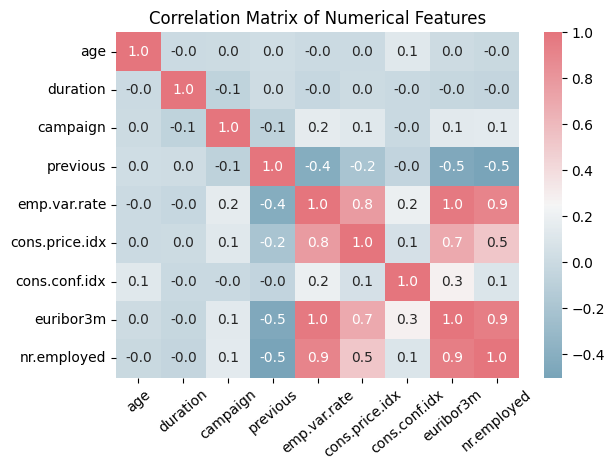

In [70]:
# Correlation analysis for numerical columns
numerical_columns = data.select_dtypes(include = ['int64', 'float64']).columns
sns.heatmap(data[numerical_columns].corr(), cmap=sns.diverging_palette(230, 10, n=1001), alpha=0.7, annot=True, fmt='.1f')
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=40)
plt.tight_layout()
# plt.savefig('correlation_matrix.png', dpi=300)

There are signs of multicolinearity on the index columns (euribor, consumer price, employment variation and number employed)

In [71]:
selected_columns = ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']

correlation_matrix = data[selected_columns].corr()

print(correlation_matrix)

                emp.var.rate  cons.price.idx  euribor3m  nr.employed
emp.var.rate        1.000000        0.775655   0.972266     0.907141
cons.price.idx      0.775655        1.000000   0.688729     0.522899
euribor3m           0.972266        0.688729   1.000000     0.945218
nr.employed         0.907141        0.522899   0.945218     1.000000


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[selected_columns]
X['constant'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = selected_columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1] - 1)]  # Exclude the constant

print(vif_data)

          Feature        VIF
0    emp.var.rate  32.553062
1  cons.price.idx   4.675213
2       euribor3m  31.138032
3     nr.employed  14.392305


C:\Users\juand\AppData\Local\Temp\ipykernel_12984\1919145305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['constant'] = 1


Looking at the correlation between those variables, and considering the VIF score ranking obtained, the columns employment var rate, euribor3m and nr.employed exhibit clear signs of multicolinearity (correlation higher than 0.9 and VIF score higher than 10). For that reason this columns should be removed from the analysis to avoid noise in the models.

In [73]:
print(numerical_columns)
def mann_whitney_significant_features(df, cols, target):
    significant_features = []
    for col in cols:
        u_stat, p_value = stats.ttest_ind(df[df[target]==1][col], df[df[target]==0][col])
        if p_value < 0.05:
            significant_features.append(col)
    
    return significant_features

print(mann_whitney_significant_features(data, numerical_columns, 'y'))

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [74]:
#Analysis of Categorical columns with Chi-square test

categorical_columns = data.select_dtypes(include = 'object').columns
def chi2_significant_features(df, cols, target):
    significant_features = []
    for col in cols:
        chi2, p, dof, expected  = stats.chi2_contingency(pd.crosstab(df[target], df[col]))
        if p < 0.05:
            significant_features.append(col)
    
    return significant_features

print(chi2_significant_features(data, categorical_columns, 'y'))

['job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week', 'poutcome']


Housing and loan were considered not significant features in relation with the target variable. Considering the day of week, the distribution explored in the EDA shows minimal differences between positive and negative outcomes on the marketing campaign so this column will not be considered into the final feature set.

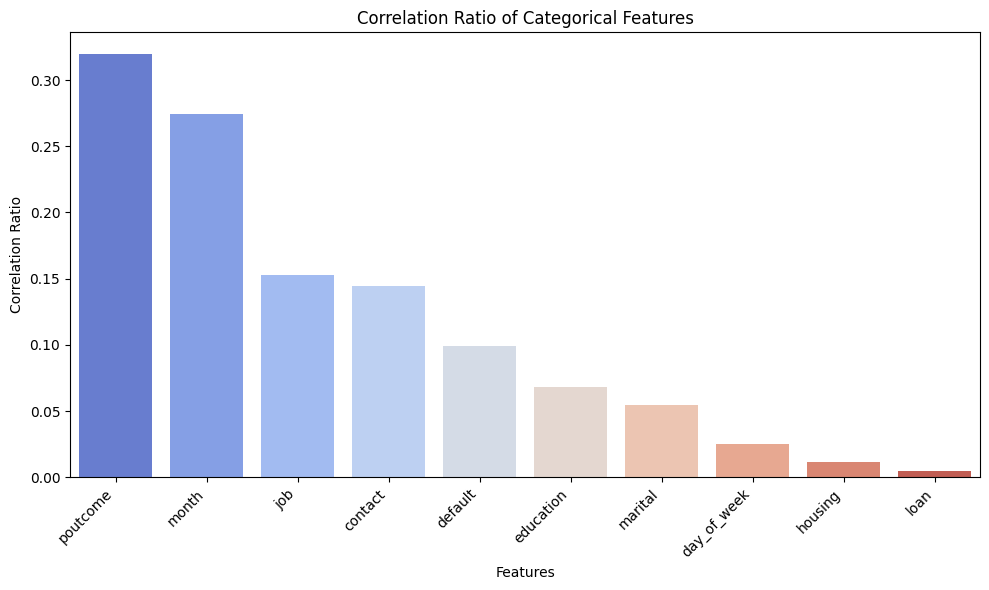

In [75]:
def correlation_ratio(categories, target):
    categories = np.array(categories)
    target = np.array(target)
    fcat, _ = pd.factorize(categories)
    cat_means = np.array([target[fcat == i].mean() for i in np.unique(fcat)])
    overall_mean = target.mean()
    numerator = np.sum([len(target[fcat == i]) * (cat_means[i] - overall_mean)**2 for i in np.unique(fcat)])
    denominator = np.sum((target - overall_mean) ** 2)
    return np.sqrt(numerator / denominator)

categorical_features = data.select_dtypes('object').copy()

row_list = []
for feature in categorical_features.columns:
    cr = correlation_ratio(data[feature], data['y'])
    row_list.append({'Feature': feature, 'Correlation Ratio': cr})
categorical_correlations = pd.DataFrame(row_list, columns=('Feature', 'Correlation Ratio'))

data_to_plot_sorted = categorical_correlations.sort_values(by='Correlation Ratio', ascending=False)
 
plt.figure(figsize=(10, 6))
 
sns.barplot(
    data=data_to_plot_sorted,
    x='Feature',
    y='Correlation Ratio',
    palette='coolwarm'
)
plt.xticks(rotation=45, ha='right')
 
plt.title('Correlation Ratio of Categorical Features')
plt.xlabel('Features')
plt.ylabel('Correlation Ratio')
 
plt.tight_layout()
plt.show()

Correlation ratio analysis confirms the results of the chi-square test showing that housing and loan are not important variables to explain the variability of the campaign outcome. Day of week stands at the third less important feature confirming the decision made by looking at the previous EDA.

In [76]:
data_features_final = ['age', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx',
                       'job', 'marital', 'education', 'default', 'contact', 'month', 'poutcome', 'y']

### Data Cleaning

Since the EDA was previously performed on the assignment 1, this notebook will only perform the changes and address the issues identified on the selected columns

In [77]:
data_cleaned = data[data_features_final].copy()

In [78]:
#Identifying duplicated values
mask = data_cleaned.duplicated()
print(data_cleaned[mask].value_counts())

age  duration  campaign  previous  cons.price.idx  cons.conf.idx  job          marital   education            default  contact    month  poutcome     y
42   71        1         0         93.444          -36.1          admin.       married   university.degree    no       cellular   aug    nonexistent  0    2
24   114       1         0         93.075          -47.1          services     single    high.school          no       cellular   apr    nonexistent  0    1
37   101       2         0         93.444          -36.1          technician   single    professional.course  no       cellular   aug    nonexistent  0    1
     356       1         0         93.444          -36.1          admin.       married   university.degree    no       cellular   aug    nonexistent  0    1
38   117       2         0         94.465          -41.8          admin.       married   high.school          no       telephone  jun    nonexistent  0    1
39   23        1         0         94.465          -41.8       

In [79]:
# Verifying and deleting duplicated values
data_cleaned.drop_duplicates(inplace=True)
data_cleaned.shape

(41120, 14)

In [80]:
# Verifying null values
data_cleaned.isnull().sum().sum()

0

In [81]:
#Checking for outliers in all the numerical columns
numerical_columns = data_cleaned.select_dtypes(include = ['int64', 'float64']).columns

#Checking the outliers in a non-graphical way
Q1 = data_cleaned[numerical_columns].quantile(0.25)
Q3 = data_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (data_cleaned[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

#Displaying the outliers
print(f"Outliers in the numerical columns : \n{outliers}")


Outliers in the numerical columns : 
age                467
duration          2955
campaign          2406
previous          5620
cons.price.idx       0
cons.conf.idx      446
dtype: int64


In [82]:
percentage_outliers = (outliers / data_cleaned.shape[0]) * 100
print(f"Percentage of outliers in the numerical columns : \n{percentage_outliers}")

Percentage of outliers in the numerical columns : 
age                1.135700
duration           7.186284
campaign           5.851167
previous          13.667315
cons.price.idx     0.000000
cons.conf.idx      1.084630
dtype: float64


Considering that duration and campaign possess more than 5% of outliers, this data will be handled. For previous the high value of outliers correspond to the amount of 0 meaning no previous contact for most customers, however, this information could be valuable to test with the model performance so these values will be maintained.

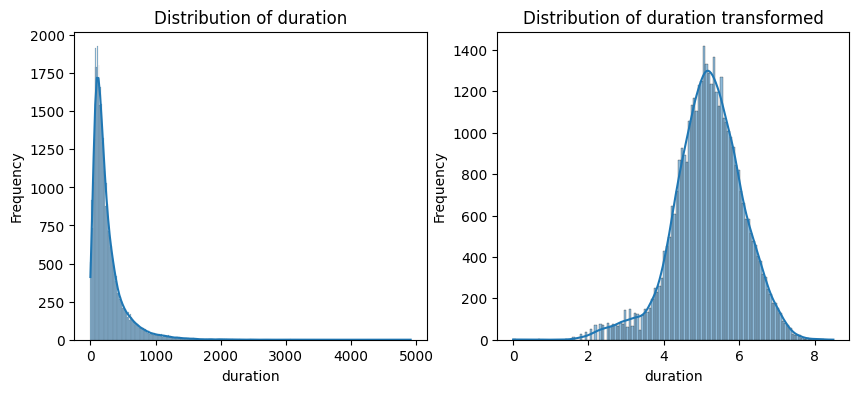

In [83]:
#Log Transformation for duration column
data_cleaned['log_duration'] = np.log1p(data_cleaned['duration'])

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['duration'], kde = True)
plt.title(f"Distribution of duration")
plt.xlabel('duration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['log_duration'], kde = True)
plt.title(f"Distribution of duration transformed")
plt.xlabel('duration')
plt.ylabel('Frequency')

data_cleaned.drop('duration', axis=1, inplace=True)

Log transformation was applied taking into account that the outliers in duration often corresponds to extreme values but not necessarily an issue with the data because the call duration may vary often depending on the customer and the sales team persistence. Log transformation helps to reduce the effect of the outliers by compressing the range, obtaining a nearly-normal distribution.

In [84]:
#Outlier Removal applying IQR for campaign column (reduces performance but logit converges)
Q1 = data_cleaned['campaign'].quantile(0.25)
Q3 = data_cleaned['campaign'].quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data_cleaned[(data_cleaned['campaign'] >= (Q1 - 1.5 * IQR)) & (data_cleaned['campaign'] <= (Q3 + 1.5 * IQR))]

data_cleaned.shape

(38714, 14)

For Campaign, the outliers correspond to most erroneous contacts, considering that users with more than 50 contacts in the same campaign does not seem to be a possible case for the telecommunication marketing team because of the time wasted only in few customers instead of trying to get more sales from new potential customers. To handle that outliers an approac of feature engineering will be applied to minimise the impact of extreme values defining bins for the campaign variable and encoding into categories those values.

### Feature Engineering

Some features can be transformed or complemented in order to enhance model performance.

In [85]:
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=[0, 30, 45, 60, data_cleaned['age'].max()], labels=['<30', '30-45', '45-60', '>=60'])
contingency_table = pd.crosstab(data_cleaned['age_group'], data_cleaned['y'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print('p-value:', p)

p-value: 7.513596998537426e-267


In [86]:
# BINNING CAMPAIGN (IMPROVES METRICS BUT LOGIT DOESN'T CONVERGE)
# campaign_bins = [0, 3, 6, float('inf')]
# campaign_labels = ['0-2', '3-5', '6+']
# data_cleaned['campaign_group'] = pd.cut(data_cleaned['campaign'], bins=campaign_bins, labels=campaign_labels, right=False)
# data_cleaned.drop('campaign', axis=1, inplace=True)

### Data Transformation & Splitting

The cleaned dataset with the new features will be subject of encoding for categorical variables if apply, as well as subject of scaling for the specific models that require scaled data to perform better.

In [87]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38714 entries, 0 to 41179
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             38714 non-null  int64   
 1   campaign        38714 non-null  int64   
 2   previous        38714 non-null  int64   
 3   cons.price.idx  38714 non-null  float64 
 4   cons.conf.idx   38714 non-null  float64 
 5   job             38714 non-null  object  
 6   marital         38714 non-null  object  
 7   education       38714 non-null  object  
 8   default         38714 non-null  object  
 9   contact         38714 non-null  object  
 10  month           38714 non-null  object  
 11  poutcome        38714 non-null  object  
 12  y               38714 non-null  category
 13  log_duration    38714 non-null  float64 
 14  age_group       38714 non-null  category
dtypes: category(2), float64(3), int64(3), object(7)
memory usage: 4.2+ MB


In [88]:
one_hot_columns = ['job', 'marital', 'default', 'contact', 'age_group', 'month', 'poutcome']
data_cleaned = pd.get_dummies(data_cleaned, columns=one_hot_columns, drop_first=True)
data_cleaned.head()

,age,campaign,previous,cons.price.idx,cons.conf.idx,education,y,log_duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,contact_telephone,age_group_30-45,age_group_45-60,age_group_>=60,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,40,1,0,93.994,-36.4,basic.6y,0,5.023881,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,56,1,0,93.994,-36.4,high.school,0,5.730100,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
2,45,1,0,93.994,-36.4,basic.9y,0,5.293305,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,59,1,0,93.994,-36.4,professional.course,0,4.941642,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
4,41,1,0,93.994,-36.4,unknown,0,5.384495,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False


In [89]:
encoder = OrdinalEncoder(categories=[['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']])
data_cleaned['education'] = encoder.fit_transform(data_cleaned[['education']])
data_cleaned.head()

,age,campaign,previous,cons.price.idx,cons.conf.idx,education,y,log_duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,contact_telephone,age_group_30-45,age_group_45-60,age_group_>=60,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,40,1,0,93.994,-36.4,3.0,0,5.023881,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,56,1,0,93.994,-36.4,5.0,0,5.730100,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
2,45,1,0,93.994,-36.4,4.0,0,5.293305,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,59,1,0,93.994,-36.4,6.0,0,4.941642,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
4,41,1,0,93.994,-36.4,0.0,0,5.384495,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False


In [90]:
data_cleaned['y'].value_counts(normalize=True)

y
0    0.883091
1    0.116909
Name: proportion, dtype: float64

Due to the present imbalance between both classes on the target variable, stratified splitting stands as a reasonable strategy to split the data ensuring the same proportion in subsets of training and validation

In [91]:
index_train, index_valid = train_test_split(np.array(data_cleaned.index), stratify=data_cleaned['y'],
                                            train_size=0.8, random_state= 27)

train = data_cleaned.loc[index_train, :].copy()
valid = data_cleaned.loc[index_valid, :].copy()

In [92]:
y_train = train.pop('y')
y_val = valid.pop('y')
X_train = train
X_val = valid

In [93]:
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

scaling_columns = ['age', 'previous',
       'cons.price.idx', 'cons.conf.idx', 'log_duration','campaign']
       
scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(X_train[scaling_columns])

X_train_scaled[scaling_columns] = scaler.transform(X_train_scaled[scaling_columns])
X_val_scaled[scaling_columns] = scaler.transform(X_val_scaled[scaling_columns])

### Modelling Phase

Considering that the data is already cleaned and transformed according to the ML techniques requirements, the following section will implement different approaches to predict succesful outcome of customer according to their characteristics

#### Parametric Model (Logistic Regression)

In [94]:
X_train_scaled.loc[:, X_train_scaled.dtypes == 'bool'] = X_train_scaled.loc[:, X_train_scaled.dtypes == 'bool'].astype(int)
X_val_scaled.loc[:, X_val_scaled.dtypes == 'bool'] = X_val_scaled.loc[:, X_val_scaled.dtypes == 'bool'].astype(int)


In [95]:
df = pd.DataFrame(X_train_scaled, columns=X_train_scaled.columns)

df = sm.add_constant(df)

# Fit the logistic regression model using statsmodels
logit = sm.Logit(y_train, df)
result = logit.fit()

# Print the model summary
print(result.summary())

# AIC to assess if the model is becoming better or not
print(result.aic)

Optimization terminated successfully.
         Current function value: 0.219734
         Iterations 25
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                30971
Model:                          Logit   Df Residuals:                    30932
Method:                           MLE   Df Model:                           38
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                  0.3909
Time:                        20:19:41   Log-Likelihood:                -6805.4
converged:                       True   LL-Null:                       -11172.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.6835      0.189    -14.229      0.000      -3.053      -2.31

From the results table we can conclude that the model has converged (parameter converged 'True'), meaning that the best approach to predict outcomes was calculated in the training process.
Looking at the coefficient values is important to highlight the 'previous_outcome' feature importance, as the value 'success' is a greater influence on model output. This confirms the hypothesis stated on the EDA section that showcased the importance of the previous campaigns outcome to build confidence on customers leading to success on further campaign contacts.
In the same way, duration and age_group features show importance.
P-values analysis showcases the encoded feature 'default_yes' with a p-value higher than expected meaning no importance of that 

In [96]:
from sklearn.linear_model import LogisticRegression

columns=['Sensitivity', 'Specificity', 'Precision', 'AUC']
rows=['Logistic regression StatsModels', 'Logistic regression SkLearn']
results=pd.DataFrame(0.0, columns=columns, index=rows)

logit2 = LogisticRegression(penalty=None)
logit2.fit(X_train_scaled, y_train)

methods = [result, logit2]

y_val = np.ravel(y_val)
y_prob = np.zeros((len(y_val), len(rows)))

for i, method in enumerate(methods):
    try:
        y_prob = method.predict_proba(X_val_scaled)[:,1]
    except:
        df = pd.DataFrame(X_val_scaled, columns=X_val_scaled.columns)
        df = sm.add_constant(df, has_constant='add')
        y_prob = method.predict(df)

    tau=0.23
    y_pred = (y_prob > tau).astype(int)
    loss =  5*((y_pred!=y_val) & (y_pred==0)) + 1*((y_pred!=y_val) & (y_pred==1))

    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

    results.iloc[i,0] =  tp/(tp+fn)
    results.iloc[i,1] =  tn/(tn+fp)
    results.iloc[i,2] =  precision_score(y_val, y_pred)
    results.iloc[i,3] =  roc_auc_score(y_val, y_prob)

results.round(2)

,Sensitivity,Specificity,Precision,AUC
Logistic regression StatsModels,0.7,0.92,0.52,0.92
Logistic regression SkLearn,0.7,0.92,0.52,0.92


Both methods (using sklearn or statsmodels) have shown similar results regarding sensitivity and specificity, as well as a balanced relation between sensitivity (recall) and precision given by the value of the ROC-AUC.

With that values, is time to perform hyperparameter tuning to optimize model results by the use of cross-validation techniques.

In [102]:
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
}
logit_gridsearch = LogisticRegression(solver='liblinear', random_state=27)
gs = GridSearchCV(logit_gridsearch, hyperparameters, cv=10, scoring='recall')
gs.fit(X_train_scaled, y_train)

print(f'Best parameter configuration: {gs.best_params_}')


columns=['Sensitivity', 'Specificity', 'Precision', 'AUC']
rows=['Logistic regression Grid Search CV']
results=pd.DataFrame(0.0, columns=columns, index=rows)

y_prob = gs.best_estimator_.predict_proba(X_val_scaled)[:,1]
tau=0.23
y_pred = (y_prob > tau).astype(int)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
results.iloc[0,0] =  tp/(tp+fn)
results.iloc[0,1] =  tn/(tn+fp)
results.iloc[0,2] =  precision_score(y_val, y_pred)
results.iloc[0,3] =  roc_auc_score(y_val, y_prob)
results.round(2)

Best parameter configuration: {'C': 10, 'penalty': 'l1'}


,Sensitivity,Specificity,Precision,AUC
Logistic regression Grid Search CV,0.7,0.92,0.52,0.92


With the hyperparameter tuning the best parameters were found using C of value 10 and L1 regularisation. However, given the threshold to measure predictions, the metrics keep stable with almost 70% of sensitivity, also known as Recall and 0.52 on Precision, with a 0.92 on AUC.

Given that the data is imbalanced, an analysis of ROC Curve will not be insightful because of the higher values of specificity regardless of the quality of the model. For that reason, Precision-recall curve will be analised to find appropriate threshold for predictions.

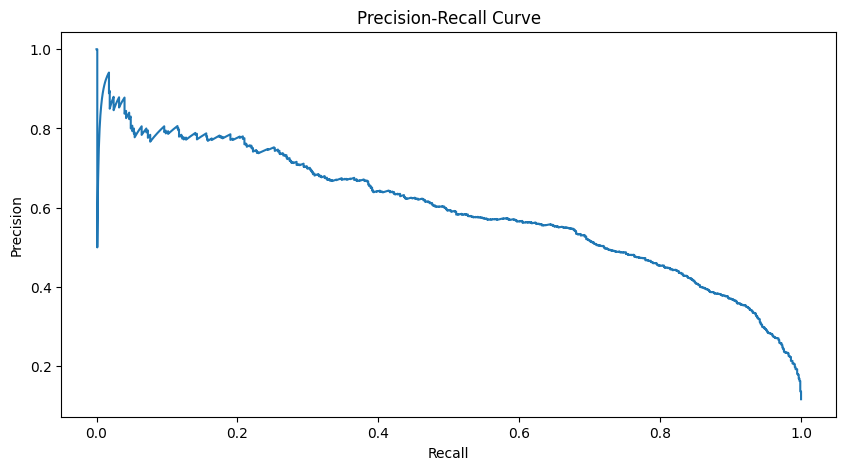

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Now, it is important to define an acceptable threshold that maximizes the interaction and balance between precision and recall, for that reason, F1-score analysis is applied.

In [104]:
precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1_score = f1_scores[best_index]

print(f'Best Threshold: {best_threshold:.2f}, Best F1 Score: {best_f1_score:.2f}')

Best Threshold: 0.25, Best F1 Score: 0.61


The best threshold for classification is 0.25 (similar to the 0.23 showed on previous metrics). This threshold will be considered to further examination of Non-parametric models to identify the best approach in predicting campaign outcomes.

In [105]:
columns=['Sensitivity', 'Specificity', 'Precision', 'AUC']
rows=['Logistic regression Grid Search CV']
results=pd.DataFrame(0.0, columns=columns, index=rows)

y_prob = gs.best_estimator_.predict_proba(X_val_scaled)[:,1]
tau=0.25
y_pred = (y_prob > tau).astype(int)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
results.iloc[0,0] =  tp/(tp+fn)
results.iloc[0,1] =  tn/(tn+fp)
results.iloc[0,2] =  precision_score(y_val, y_pred)
results.iloc[0,3] =  roc_auc_score(y_val, y_prob)
results.round(2)

,Sensitivity,Specificity,Precision,AUC
Logistic regression Grid Search CV,0.68,0.92,0.54,0.92


With the defined threshold the metrics get to 0.68 on Sensitivity and 0.54 on precision, meaning more balance between the rate of false positives and false negatives in the confusion matrix. Into business context, it means that the model is able to predict a considerable amount of customers with true successful outcomes, as well as can discriminate most of the customers with less probability to accept the campaign. 

#### Non-parametric Model (Decision Tree)

In [114]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=27)

dtree.fit(X_train, y_train)

columns=['Sensitivity', 'Specificity', 'Precision', 'AUC']
rows=['Decision Tree']
results=pd.DataFrame(0.0, columns=columns, index=rows)

y_prob = dtree.predict_proba(X_val)[:,1]
tau=0.25
y_pred = (y_prob > tau).astype(int)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
results.iloc[0,0] =  tp/(tp+fn)
results.iloc[0,1] =  tn/(tn+fp)
results.iloc[0,2] =  precision_score(y_val, y_pred)
results.iloc[0,3] =  roc_auc_score(y_val, y_prob)
results.round(2)

,Sensitivity,Specificity,Precision,AUC
Decision Tree,0.48,0.93,0.47,0.7


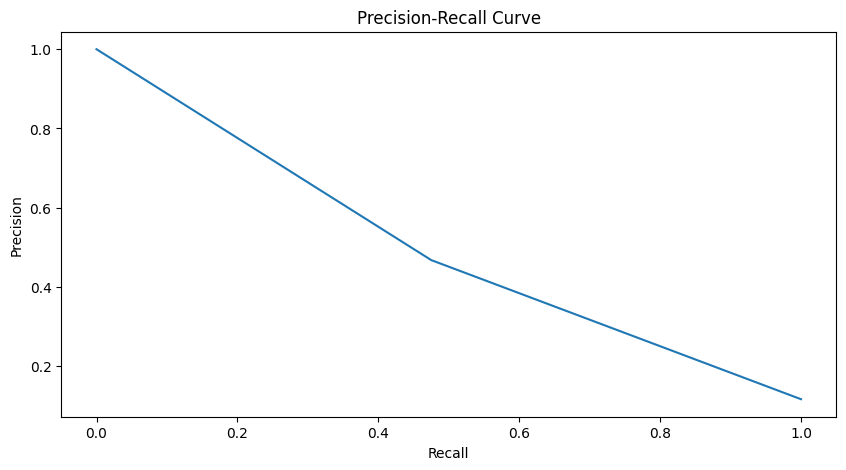

In [122]:
# Compute Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [118]:
precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1_score = f1_scores[best_index]

print(f'Best Threshold: {best_threshold:.2f}, Best F1 Score: {best_f1_score:.2f}')

Best Threshold: 0.33, Best F1 Score: 0.51


In [120]:
columns=['Sensitivity', 'Specificity', 'Precision', 'AUC']
rows=['Decision Tree']
results=pd.DataFrame(0.0, columns=columns, index=rows)

y_prob = dtree.predict_proba(X_val)[:,1]
tau=0.33
y_pred = (y_prob > tau).astype(int)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
results.iloc[0,0] =  tp/(tp+fn)
results.iloc[0,1] =  tn/(tn+fp)
results.iloc[0,2] =  precision_score(y_val, y_pred)
results.iloc[0,3] =  roc_auc_score(y_val, y_prob)
results.round(2)

,Sensitivity,Specificity,Precision,AUC
Decision Tree,0.48,0.93,0.47,0.7
